<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/cap6_aprendizado_de_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6. Aprendizado de Máquina**
---

Neste capítulo você irá aprender:

1. O que é o Aprendizado de Máquina Supervisionado
2. A importância dos Modelos de Aprendizado de Máquina na predição de Séries não Lineares e Multidimensionais
2. Como aplicar Modelos de Aprendizado Tradicionais com o `Scikit-Learn` e modelos de Deep Learning com o `PyTorch`




Modelos de Aprendizado de Máquina, ou ML (*Machine Learning*), são aplicados a uma série de tarefas que vão da identificação de fraudes em cartões de crédito e a recomendação de produtos, até sistemas para precificação e predição das condições do tempo. 

Esses modelos também vêm sendo aplicados com sucesso na predição de Séries Temporais complexas, principalmente na presença de não linearidades e modelos multimodais. Como você aprendeu nos capítulos anteriores todos os modelos AR, MA, ARMA, ARIMA etc. são modelos de predição lineares, no sentido de que os valores das séries são aditivos ou multiplicativos (veja no capítulo 1). Os modelos de Aprendizado de Máquina não apresentam essa restrição, o que permite solucionar problemas bastante complexos na predição de Séries Temporais. Eles ainda são bastante fáceis de usar pois aproximam bastante um grande conjunto de Séries com pouca ou quase nenhuma informação sobre sua estrutura (tendência, sazonalidade, periodicidade etc.) embora, essa falta de poder explicativo dos modelo de ML seja em muitos casos uma desvantagem desses modelos.

Embora este texto seja uma introdução ao tema de Séries Temporais, o uso recentes desses modelos vem crescendo em vários seguimentos, da predição de demanda de produtos à aplicações em ciência, telecomunicações e medicina, com soluções suportadas por grandes empresas de tecnologia como Meta (`Prophet`,`Neuralprophet`, `PyTorch`) e Google (`TensorFlow`). Assim, incluímos este capítulo para você conhecer esses modelos e algumas de suas aplicações, mesmo sendo um conteúdo que você não irá encontrar nos textos mais tradicionais da área.








## O Aprendizado de Máquina Supervisionado

O Aprendizado de Máquina tem uma série de variantes para a solução de diferentes problemas que vão da classificação e agrupamento de notícias e imagens, à detecção de anomalias no tráfeco de internet ou a tradução automática de texto. Nesta introdução, para nossos propósitos, será suficiente nos determos nos modelos de **Aprendizado Supervisionado**. Esses modelos buscam encontrar, à partir de um conjunto de dados de entrada e saída, uma função que melhor ajusta esse conjunto de dados. O **Modelo de Regressão Linear**, que discutimos no capítulo 1, é um modelo típico de Aprendizado Supervisionado e empregaremos ele para que você possa entender como esses modelos funcionam de modo geral. 

## Aproximando uma Função: O Preço de Imóveis

Você pode imaginar que o preço de um imóvel é certamente, dentre outros fatores, uma *função* de características do imóvel com área construída, número de suítes e garagens, ano da construção, sua localização etc.  Colocamos *função* em destaque por que, de fato, não conhecemos a *função real*, mas podemos obter um conjunto de dados de imóveis com suas características e preço e buscar um modelo ou função que melhor aproxima esses dados. Essa é a ideia por trás dos modelos supervisionados. 



<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Slide1.PNG" width=700>

<small>
<b>
Fig. 1. Esquema geral do Aprendizado Supervisionado de Máquina.

Nós não temos o preço de todos os imóveis, mas podemos obter uma amostra que, sendo significativamente grande, será útil para inferirmos sobre o preço de outros imóveis que não constam da amostra. Vamos chamar esse conjunto de **Conjunto de Treinamento**, e ele é a base dos modelos de aprendizado supervisionado. 

Existem muitos modelos que podem ser empregados para aproximarem um conjunto de valores de entrada e suas saídas. Esses modelos podem ser agrupados em **Classes de Modelos**, como a Classe dos Modelos de Regressão Linear. Podemos escolher essa classe como nossa hipótese para obter um modelo e aproximar o preço dos imóveis. Note, entretanto, que  existem infinitos modelos que podem ser aplicados, para os infinitos valores de coeficientes da regressão:

$$ \text{Preço Imóvel} = a_0 + a_1 \times \text{Área} + a_2 \times \text{nr Suítes} ...$$



<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Slide2.PNG" width=700>

<small>
<b>
Fig. 2. Esquema geral do Aprendizado Supervisionado de Máquina e um exemplo de aplicação à Predição de Preços de Imóveis por Modelos Lineares.

Para encontrarmos o melhor modelo, dentre todos os modelos lineares possíveis, precisamos estabelecer uma métrica. Afinal, o que é o melhor modelo? Podemos, por exemplo, buscar o modelo que melhor aproxima os valores obtidos aos valores do nosso conjunto de treinamento empregando para isso o erro quadrático médio, **MSE** (e, à depender da classe de modelo, muitas outras métricas poderiam ser empregadas para definir o *melhor*). 

$$ MSE = \frac{1}{n} \sum_{i=0}^{n} \sqrt{ (\text{Preço}_i - \text{Preço Estimado}_i)^2 }$$ 

E o aprendizado pode então se resumir a um problema de otimização de encontrar os valores dos coeficientes $a_0, a_1, ..., a_n$ que minimizam o erro,

$$ \min_{a_0, a_1, ..., a_n} MSE = \frac{1}{n} \sum_{i=0}^{n} \sqrt{ (\text{Preço}_i - \text{Preço Estimado}_i)^2 }$$ 

O que é em geral, no caso da regressão linear, obtido por um método de mínimos quadrados (OLS).

## Outros modelos

Mas no aprendizado de máquina muitas outras classes de modelos, além dos modelos lineares, podem ser aplicados.

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Slide3.PNG" width=700>

<small>
<b>
Fig. 3. Esquema geral do Aprendizado Supervisionado de Máquina e outras Classes de Regressores.

Esses modelos empregam outros princípios que podem divergir bastante e levar a resultados bastante diferentes dos modelos lineares. Você pode pensar, por exemplo, nos modelos regressão polinomial ou de aproximação de funções por séries, como as séries de Taylor e Fourier. Mas ainda existem modelos que segue paradigmas bastante diferentes desses modelos, como modelos baseados em Árvores de Decisão, K-Vizinhos mais Próximos ou os modelos de Redes Neurais Artificiais. 

Não vamos entrar aqui em detalhes de como cada um desses modelos funciona, mas o importante é que você entenda que, à exemplo do modelo de Regressão Linear, o Aprendizado de Máquina consiste em selecionar de uma classe de modelos o que melhor se ajusta aos dados, e que cada uma dessas classes pode ter uma forma bastante diferente do método que empregamos acima, embora a ideia seja sempre a mesma.

## Aplicando Diferentes Modelos

Vamos então ver como podemos aproximar uma função por outras classes de modelos mais comuns ao Aprendizado de Máquina, nos limitando aqui aos modelos **regressores**, isto é, modelos que estimam valores em contraposição aos modelos de classificação, também bastante comuns mas que não são de interesse para nós no momento. Empregaremos vários modelos para aproximar agora uma função temporal conhecida como Potencial de Ação.

O Potencial de Ação é uma *função* que explica a ativação dos neurônios e que tem um papel importante nas neurociências e aplicações médicas. Colocamos *função* em destaque por que, de fato, não conhecemos a *função real* desse potencial, mas podemos obter uma série de medidas no tempo e buscar aproximar esses dados por algum modelo ou função. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import seaborn as sns
df = sns.load_dataset('dots')
df = df[(df.choice == 'T2') & (df['align'] == 'dots')]
df = df[['time','firing_rate']].reset_index(drop=True)
df.head()

,time,firing_rate
0,-80,34.970107
1,-80,36.785815
2,-80,34.478506
3,-80,34.991424
4,-80,32.241533


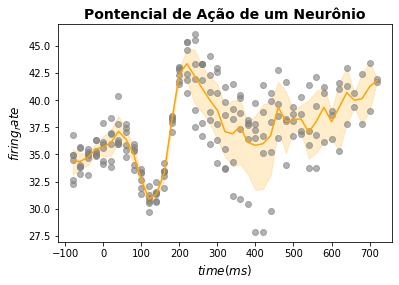

In [3]:
sns.lineplot(x=df.time, y=df.firing_rate,color='orange')
plt.scatter(x=df.time, y=df.firing_rate,color='gray',alpha=0.6)

plt.title('Pontencial de Ação de um Neurônio',fontsize=14,weight='bold')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.show()

A linha amarela representa uma suavização do conjunto de pontos da série à exemplo do que você viu no capítulo 2. Vamos separar nesse conjunto de dados os dados de **Treinamento** e **Teste** fizemos nos capítulos anteriores na construção dos modelos lineares. A diferença aqui é que, por hora, sendo uma função do tempo esses conjuntos não precisam ser contíguos. Faremos isso mais adiante quando tratarmos Séries Temporais com dependência sequencial (capítulo 1).

In [4]:
from sklearn.model_selection import train_test_split

X = df[['time']]
y = df.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

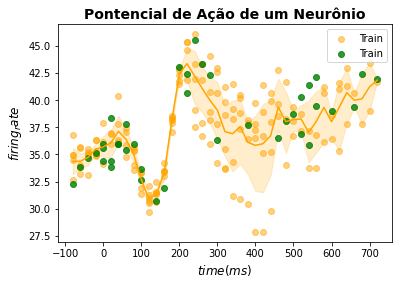

In [5]:
sns.lineplot(x=df.time, y=df.firing_rate,color='orange')
plt.scatter(x=X_train.time, y=y_train,color='orange',alpha=0.5,label='Train')
plt.scatter(x=X_test.time, y=y_test,color='green',alpha=0.8,label='Train')

plt.title('Pontencial de Ação de um Neurônio',fontsize=14,weight='bold')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.legend()
plt.show()

Vamos começar com um modelo de Regressão Linear simples. Assim você poderá entender como são aplicados modelos Regressores em geral com o `Scikit-Learn`, a principal biblioteca de ML para modelos não profundos (Deep Learning).

De modo geral o regressores (chamados de modo geral de estimadores) são aplicados do seguinte modo:

<br>

`# instancia o estimador, isto é, a classe de modelos a ser empregada`

> **`regressor = <regressor>(<regressor_parameters>)`** 

`# treina o modelo, isto é, encontra o melhor modelo que se ajusta aos dados de treinamento`

> **`regressor.fit(X_train, y_train)`**

`# Faz a predição dos valores de teste ou de novos valores`

> **`y_pred = regressor.predict(X_test)`**


### Modelo Linear

Abaixo você encontra uma aplicação do modelo linear para estimar a função de Ativação do nosso exemplo.

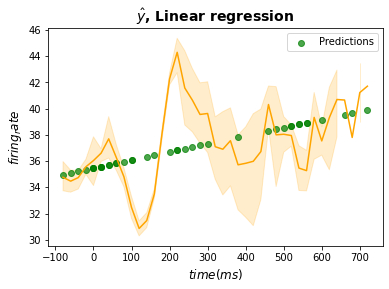

In [6]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

sns.lineplot(x=X_train.time,y=y_train,color='orange')
plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

plt.title('$\\hat{y}$' + ', Linear regression',fontsize=14,weight='bold')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.legend()

plt.show()

Esse é o melhor modelo que a classe de regressores lineares pode fornecer e, de fato, você observa que ele se ajusta muito pouco aos dados. Modelos lineares não podem capturar a não linearidade da função de ativação. 



### Modelo Regressor K-Vizinhos mais Próximos

O modelo **K-Vizinhos mais Próximos** é um modelo que ilustra bastante bem haverem outros princípios que permitem a aproximação de funções. A ideia do K-Vizinhos mais Próximos é que a estimativa de um valor desconhecido da função, ou do conjunto de teste, pode ser obtido por uma média do valor dos vizinhos mais próximos no conjunto de treinamento. O número de vizinhos $k$ variando de 1 a $n$ elementos do conjunto mais, em geral, não sendo muito superior a uma ou duas dezenas.  

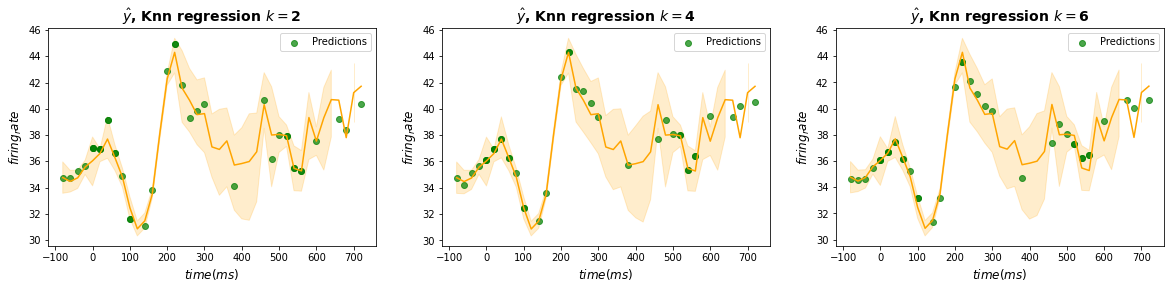

In [7]:
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize=(20,4))

for k in range(1,4):

  regressor = KNeighborsRegressor(n_neighbors=2*k)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  plt.subplot(1,3,k)
  sns.lineplot(x=X_train.time,y=y_train,color='orange')
  plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

  plt.title('$\\hat{y}$' + ', Knn regression ' + '$k=$' + str(2*k),fontsize=14,weight='bold')
  plt.xlabel('$time (ms)$',fontsize=12)
  plt.ylabel('$firing_rate$',fontsize=12)
  plt.legend()

plt.show()



É uma ideia bastante simples e basta você encontra os $k$ vizinhos mais próximos de um ponto que você deseja estimar a função e fazer a média desses valores. Apesar da simplicidade o modelo consegue capturar bastante bem a não linearidade da função como você pode ver acima. Esse modelo, entretanto, não é adequado para *forecasting*, isto é as estimativas de valores *futuros* e fora do intervalo de valores do conjunto de treinamento e veremos mais adiante como ajustar esses modelos para a predição de séries temporais.

### Outros Modelos Regressores

Existem muitos outros modelos e que empregam paradigmas bastante diferentes do modelo Linear ou do modelo de k-Vizinhos mais próximos e você poderá encontrar muitas referências sobre isso. Deixamos ao final algumas na seção final *Saiba Mais* deste capítulo.

O que nos interessa é saber que existem muitos modelos e que, por partirem de princípios de construção diferentes, levam a diferentes soluções de aproximação da função original.

Abaixo você pode ver a aplicação de 3 modelos regressores bastante empregados o **Decision Tree Regressor**, um modelo baseado em **Máquinas de Vetores de Suporte** e **XGBoosting Regressor**. Todos tem a mesma lógica de aplicação dos modelos anteriores, linear a k-vizinhos mais próximos, e você pode alterar o código abaixo para experimentar ainda outros modelos.

[21:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


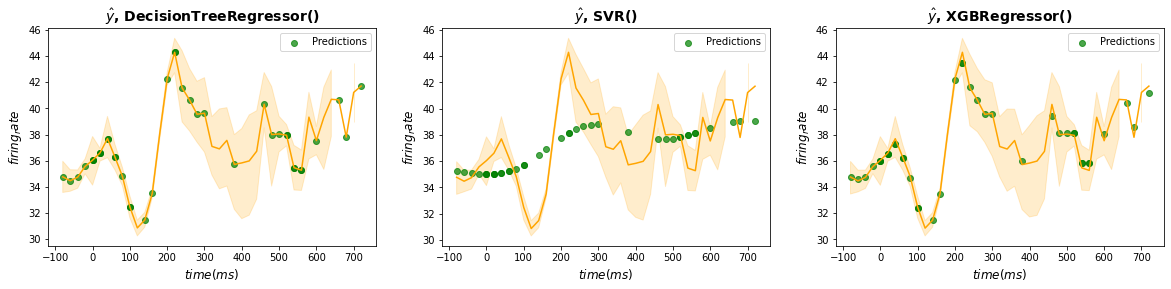

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor

from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

base_estimators = [ DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

plt.figure(figsize=(20,4))
k = 1
for regressor in base_estimators:

  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  plt.subplot(1,3,k)
  k = k + 1
  sns.lineplot(x=X_train.time,y=y_train,color='orange')
  plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

  plt.title('$\\hat{y}$, ' + str(regressor),fontsize=14,weight='bold')
  plt.xlabel('$time (ms)$',fontsize=12)
  plt.ylabel('$firing_rate$',fontsize=12)
  plt.legend()

plt.show()



Visualmente o SVR não apresenta uma boa aproximação, mas vamos lembrar que neste exemplo simples não exploramos todos os parâmetros que podemos aplicar a esses modelos. 

O Aprendizado de Máquina é bastante mais amplo do que aprensentamos aqui. Aqui nos limitamos a apresentar uns poucos exemplos de Aprendizado de Máquina Supervisionado unicamente para tarefas de Regressão (estimativa de valores) e se você tiver interesse neste tema sugerimos vistar algumas das referências que indicadas no final desse capítulo. 

Essa introdução, de qualquer modo, será suficiente para aplicarmos modelos de ML para a predição de Séries Temporais complexas e não lineares.

## Bike Sharing: Machine Learning


No capítulo anterior você pôde acompanhar a análise completa de uma Série de Dados bastante complexa. O conjunto de dados Bike Sharing é uma Série bastante complexa embora com características bastante comuns a um grande número de problemas que envolvem demanda de produtos e serviços. Você pôde acompanhar uma série transformações (time index, resample etc.) que aprendemos e de análises (auto correlação, detrending, auto correlação parcial etc.) e que permitiram a construção de um modelo ARIMA de predição. Reproduzimos aqui os pontos essenciais para podermos aplicar, neste mesmo conjunto de dados, modelos de Aprendizado de Máquina.

### Preparação dos Dados

Nosso arquivo traz dados hora a hora da demanda do aluguel de bicicletas e, após a indexação dos dados, vamos fazer um resample para obter os valores máximos por dia. A ideia é a predição dos valores máximos para que não haja falta da oferta do serviço.

In [9]:
df = pd.read_csv('https://github.com/Rogerio-mack/Temporal/raw/main/Data/london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
from datetime import datetime

df.timestamp = pd.to_datetime(df.timestamp)
df['year'] = df.timestamp.dt.year
df = df[df.year == 2015]
df = df.set_index('timestamp')

In [11]:
df_resample = df.copy()
df_resample = df_resample.resample('D').max()

In [12]:
df_resample.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year
timestamp,,,,,,,,,,
2015-01-04,1039,4.0,3.5,100.0,15.0,4.0,0.0,1.0,3.0,2015
2015-01-05,3161,10.0,9.0,93.0,14.0,4.0,0.0,0.0,3.0,2015
2015-01-06,3534,11.0,11.0,88.0,27.5,7.0,0.0,0.0,3.0,2015
2015-01-07,3618,10.0,7.0,87.0,30.5,7.0,0.0,0.0,3.0,2015
2015-01-08,2351,12.0,12.0,88.0,27.0,7.0,0.0,0.0,3.0,2015


A série de dados que temos interesse é agora a dos valores `cnt`, valores máximos de demanda de bicicletas por dia e representada pela linha amarela no gráfico abaixo. 

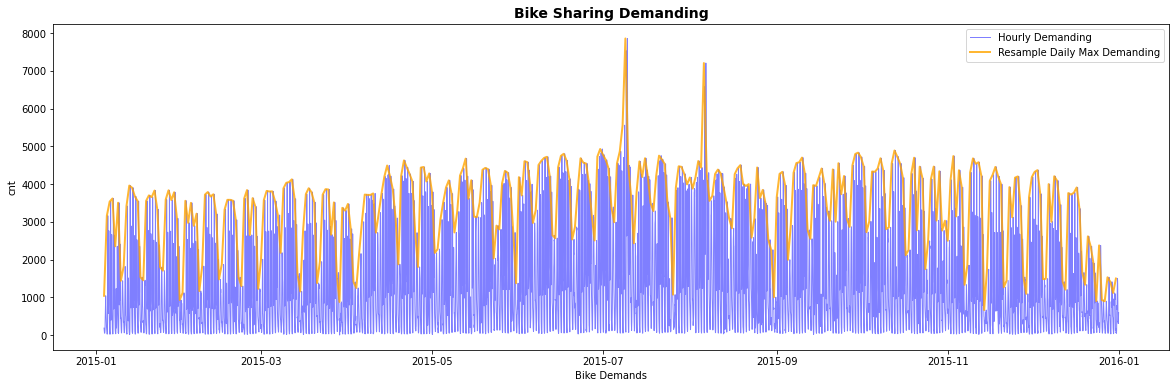

In [13]:
plt.figure(figsize=(20,6))

sns.lineplot(x = df.cnt.index, y = df.cnt, color='blue', alpha=0.5, label='Hourly Demanding',lw=1)
sns.lineplot(x = df_resample.cnt.index, y = df_resample.cnt, color='orange', alpha=0.8, label='Resample Daily Max Demanding',lw=2)

plt.title('Bike Sharing Demanding', fontsize=14, weight='bold')
plt.xlabel('Days Hours')
plt.xlabel('Bike Demands')
plt.show()

### Modelo ARIMA

Depois das análises de auto correlação e testes de tendência (ver capítulo 5) chegamos ao seguinte modelo ARIMA ótimo fazendo o forecasting para os 20% dados finais da Série (Conjunto de Teste):

In [14]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
#@markdown
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf

In [16]:
df = df_resample[['cnt']]
df.columns = ['value']
df = df.reset_index(drop=True)
# df.head()

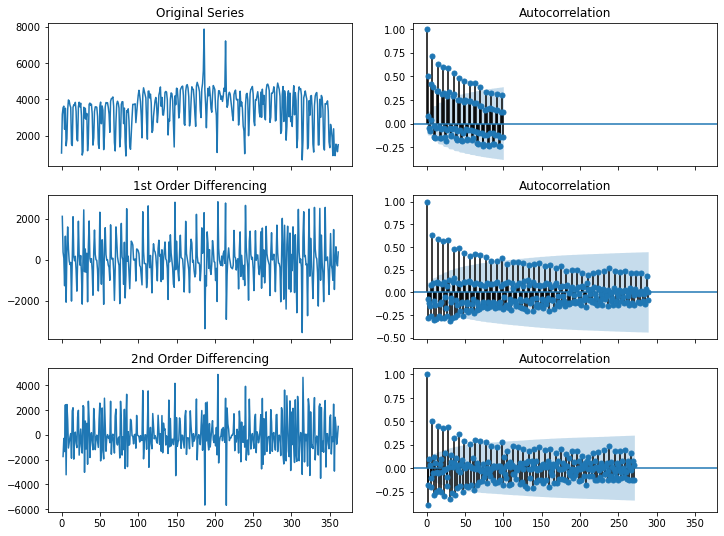

In [17]:
#@markdown
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(12,9)) 

axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1], lags=100) 

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=int(0.80 * len(df)))

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=int(0.75 * len(df))) 

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


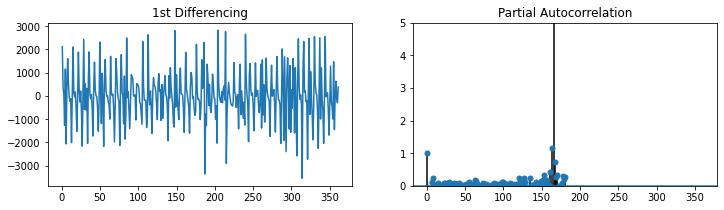

In [18]:
#@markdown
# PACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,3)) 
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1],lags=int(0.5 * len(df) - 1))

plt.show()

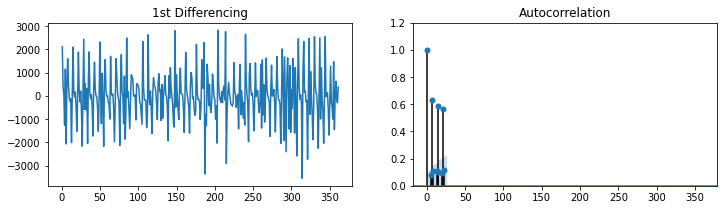

In [19]:
#@markdown
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,3)) 
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [20]:
test_size = int(0.2*len(df))
train_size = len(df) - test_size

# Create Training and Test
train = df.value[:train_size]
test = df.value[train_size:]

In [21]:
p = 7
d = 2
q = 1

model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()


In [22]:
#@markdown
yhat = model_fit.predict(p+1,len(df),dynamic=False)

# yhat2, se, conf = model_fit.forecast(len(df)-p, alpha=0.05)  # 95% conf

# yhat = yhat + yhat2

In [23]:
#@markdown
model_fit.fittedvalues

2        -0.053076
3       705.698168
4       774.518661
5      1373.568612
6      -422.823467
          ...     
285    -266.625658
286    -667.662249
287    2742.788291
288    1593.522377
289   -1600.800589
Length: 288, dtype: float64

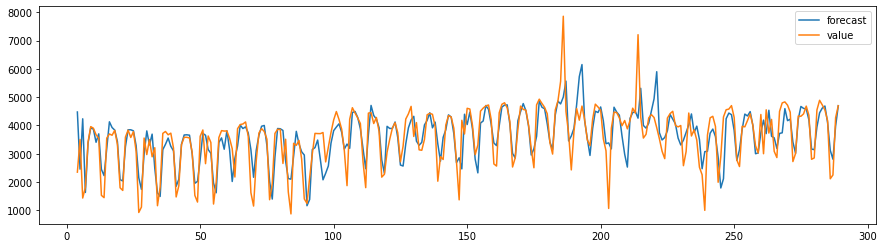

In [24]:
#@markdown
fig, ax = plt.subplots(figsize=(15, 4))

model_fit.plot_predict(dynamic=False, ax=ax)
plt.show()

In [25]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  288
Model:                 ARIMA(7, 2, 1)   Log Likelihood               -2284.963
Method:                       css-mle   S.D. of innovations            660.127
Date:                Wed, 02 Mar 2022   AIC                           4589.925
Time:                        21:34:45   BIC                           4626.555
Sample:                             2   HQIC                          4604.604
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0531      0.105     -0.503      0.615      -0.260       0.154
ar.L1.D2.value    -0.5977      0.059    -10.116      0.000      -0.714      -0.482
ar.L2.D2.value    -0.6655      0.064

In [26]:
history = [x for x in train]
predictions = list()

# forward validation
for t in test.index:
  # print(t)
	model = ARIMA(history, order=(7,2,1))
	model_fit = model.fit( )
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

In [27]:
#@markdown
def plot_forecast(y, y_pred, X_train, title='Forecasting'):

  plt.figure(figsize=(20,6))
  plt.plot(y, color='orange', alpha=0.95, label='Real')
  plt.plot(y_pred, color='darkred', alpha=0.6, label='Forecast', marker='o')
  plt.plot(y_pred[0:X_train.shape[0]], color='blue', alpha=0.6, label='Predicted', marker='o')

  plt.vlines(x=y.index[X_train.shape[0]] , ymin=0, ymax=y.max(), color='gray', linestyle='--')

  plt.title(title, fontsize=14, weight='bold')
  plt.xlabel('Days Hours')
  plt.xlabel('Bike Demands')

  plt.text(y.index[X_train.shape[0] - 75] , 0 , '0.8, conjunto de treinamento', fontsize=12, weight='bold')
  plt.text(y.index[X_train.shape[0] + 10] , 0 , '0.2, conjunto de teste', fontsize=12, weight='bold')
  plt.legend()
  plt.show()

  return



In [28]:
#@markdown
# metrics
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual, print_flag=True):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                           # ME
    mae = np.mean(np.abs(forecast - actual))                  # MAE
    mpe = np.mean((forecast - actual)/actual)                 # MPE
    mse = np.mean((forecast - actual)**2)                     # MSE
    rmse = np.mean((forecast - actual)**2)**.5                # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]                 # CORR
    acf1 = acf(forecast - actual)[1]                          # ACF1

    metrics = {'MSE':mse, 'MAPE':mape, 'ME':me, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse, 'ACF1':acf1, 'CORR':corr}

    if print_flag:
      for key, value in metrics.items():
        print(f'{key}: \t {value:.2f}')
    
    return metrics



In [29]:
len(predictions)

72

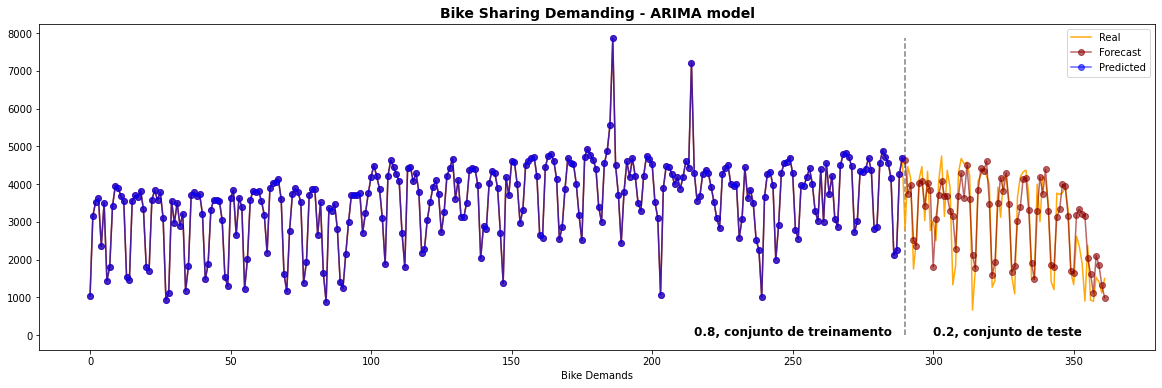

MSE: 	 479701.79
MAPE: 	 0.27
ME: 	 109.29
MAE: 	 535.00
MPE: 	 0.16
RMSE: 	 692.61
ACF1: 	 -0.12
CORR: 	 0.84


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [30]:
y_pred = np.concatenate( (np.array( history[0:train_size] ).reshape(-1), np.array(predictions).reshape(-1)) )

plot_forecast(pd.DataFrame( history ), y_pred, np.array( history[0:train_size] ), title='Bike Sharing Demanding - ARIMA model') 
cur_metrics = forecast_accuracy(y_pred[train_size::], df[train_size::].values.reshape(-1))

dict_metrics = {}
dict_metrics['ARIMA Model'] = cur_metrics

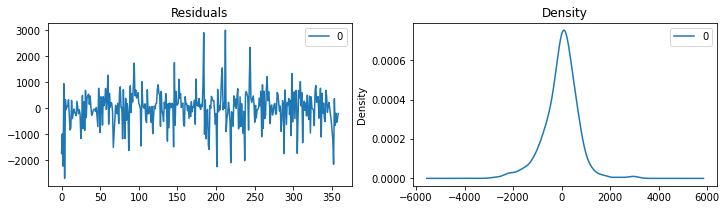

In [31]:
#@markdown
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(12,3)) 
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Aprendizado de Máquina

Como você acompanhou no começo desse capítulo os modelos de Aprendizado Supervisionado procuram *mapear* um conjunto de dados de entrada e suas saídas. Essa é a *função* que desejamos aproximar. A ideia é a mesma que você viu no capítulo 2 sobre Séries com dependência sequencial.

$  \space \space \space \text{Lag 1: } \space \space \space \space x_{t-1} \rightarrow x_t $

$  \space \space \space \text{Lag 2: } \space \space \space \space x_{t-2}, x_{t-1} \rightarrow x_t $

$  \space \space \space \text{Lag 3: } \space \space \space \space x_{t-3}, x_{t-2}, x_{t-1} \rightarrow x_t $

$  \space \space \space \space \space \space ...$

$  \space \space \space \text{Lag n: } \space \space \space \space x_{t-n}, x_{t-n-1}, x_{t-1} \rightarrow x_t $

Podemos, assim, construir uma tabela a partir da série de dados original $\bf{X}$ $ \rightarrow y$ onde $\bf{X}$ é o conjunto de dados das $n$ lags que queremos empregar em nosso modelo e $y$ a nossa variável objetivo no tempo $t$.

A função abaixo constrói essa tabela para uma coluna de dados `df` e um número de lags `n_lags`. O parâmetro `prefix` é empregado para nomear as variáveis e será útil no tratamento de Séries Multidimensionais como as que estudamos no capítulo 6.   


In [32]:
def ml_timeseries_df(df, n_lags, prefix=''):

	df_ml = pd.DataFrame()

	for i in range(n_lags,0,-1):
		df_ml[prefix + 't-' + str(i)] = df.shift(i).values[:,0]
	df_ml['t'] = df.values[:,0]
	df_ml = df_ml[n_lags:]
	df_ml = df_ml.reset_index(drop=True)

	return df_ml 

df = ml_timeseries_df(df_resample[['cnt']], n_lags=7)
df.head()

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1039.0,3161.0,3534.0,3618.0,2351.0,3505.0,1436.0,1813
1,3161.0,3534.0,3618.0,2351.0,3505.0,1436.0,1813.0,3418
2,3534.0,3618.0,2351.0,3505.0,1436.0,1813.0,3418.0,3960
3,3618.0,2351.0,3505.0,1436.0,1813.0,3418.0,3960.0,3904
4,2351.0,3505.0,1436.0,1813.0,3418.0,3960.0,3904.0,3673


<img src="https://github.com/Rogerio-mack/Temporal/raw/main/reshape.png" width=700>

<small>
<b>
Fig. 2. Reconstrução da Série de Dados em uma Tabela de Entradas e Saídas. Os valores de saída sendo estimados a partir de 7 valores anteriores da série (7-lags).

Organizado os dados desse modo podemos separar a primeira porção dos dados, $0.8$, para estimar algum dos regressores de Aprendizado de Máquina que vimos antes e aplicarmos o *forecasting* ao restante, $0.2$,dos dados da série (veja a Validação Cruzado no capítulo 3). 

In [33]:
def split_train_test(X, y, test_perc=0.2):
  
  test_size = int(len(df) * test_perc)
  train_size = len(df) - test_size

  X_train, y_train  = X[:train_size], y[:train_size]
  X_test, y_test = X[train_size:], y[train_size:]

  return X_train, y_train, X_test, y_test

X = df.drop(columns='t')
y = df[['t']] 

X_train, y_train, X_test, y_test = split_train_test(X, y, test_perc=0.2)

O código para aplicação do regressor é o mesmo que empregamos antes no exemplo da Função neuronal de Ativação, apenas que agora os dados de entrada e saída são outros.



### Decision Tree Regressor

Vamos primeiramente aplicar o regressor `Decision Tree Regressor` e verificar os resultados do modelo.

In [34]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X)

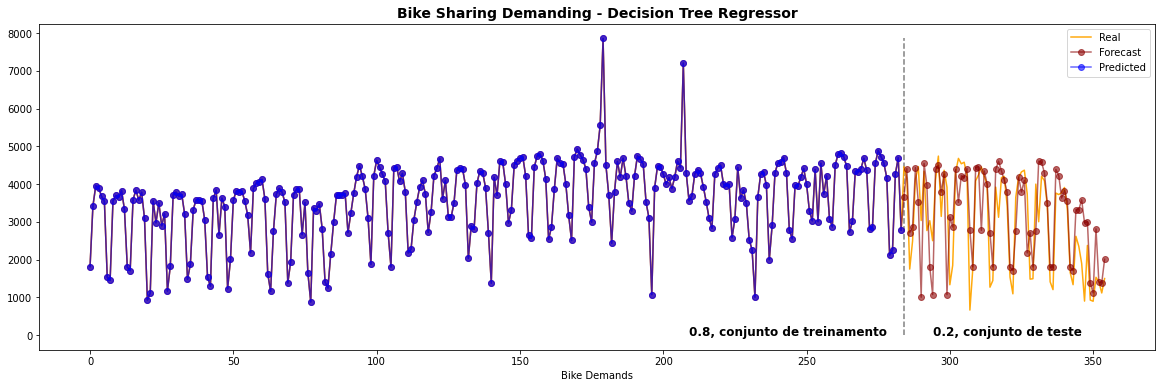

In [35]:
plot_forecast(y, y_pred, X_train, title='Bike Sharing Demanding - Decision Tree Regressor')  

In [36]:
cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['DecisionTreeRegressor'] = cur_metrics

MSE: 	 865131.56
MAPE: 	 0.34
ME: 	 180.15
MAE: 	 687.96
MPE: 	 0.20
RMSE: 	 930.12
ACF1: 	 0.07
CORR: 	 0.72


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


### XGBoost Regressor

Do mesmo modo podemos aplicar o regressor `XGBoost Regressor` você pode experimentar outros modelos se quiser.

In [37]:
from xgboost.sklearn import XGBRegressor

regressor =  XGBRegressor(random_state=0)

regressor.fit(X_train,y_train.values.reshape(-1))

y_pred = regressor.predict(X)

[21:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


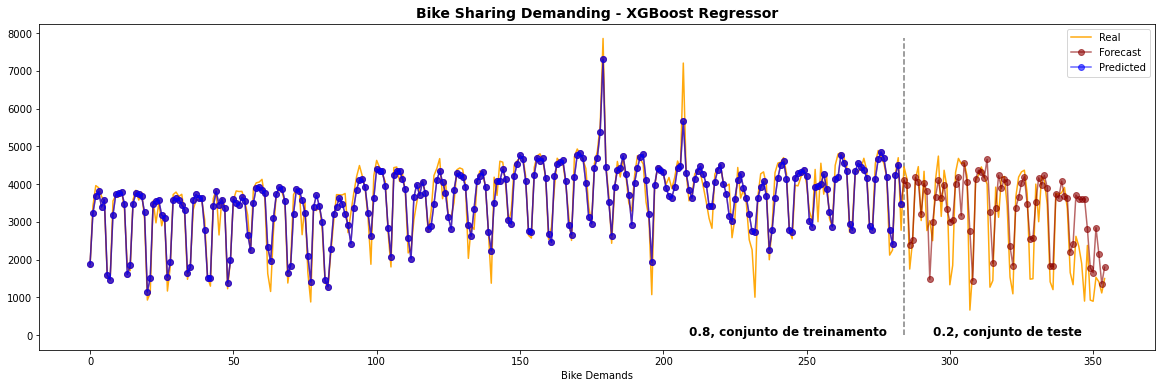

MSE: 	 686190.71
MAPE: 	 0.36
ME: 	 307.29
MAE: 	 622.81
MPE: 	 0.28
RMSE: 	 828.37
ACF1: 	 0.17
CORR: 	 0.81


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [38]:
plot_forecast(y, y_pred, X_train, title='Bike Sharing Demanding - XGBoost Regressor') 

cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['GradientBoostingRegressor'] = cur_metrics

Como você viu nos capítulos anteriores as métricas de avaliação de um modelo de predição podem ser muitas e, em geral, não temos nenhuma métrica que defina este ou aquele modelo como o melhor em quaisquer casos. Mas você pode observar que os modelos de aprendizado de máquina conseguem aproximar bastante bem a série de dados do nosso exemplo quando comparado ao modelo tradicional ARIMA (veja, por exemplo o erro absoluto médio MAE) requerendo um mínimo de esforço de análise. Poderíamos ainda refinar esses modelos (empregamos aqui parâmetros padrão em todos eles) para chegar a métricas ainda melhores e podemos mesmo envolver esses modelos em laços de programa para variar os parâmetros e encontrar de modo *automático* os melhores modelos, algo que conhecemos como **AutoML** e semelhante ao que vimos no capítulo 4 com o pacote `pmdarima` de **AutoARIMA**.

## Modelos Neurais

Redes neurais são regressores universais. Dada qualquer função (um mapeamento de entradas e saídas), sempre existirá uma Rede Neural que satisfaz essa função, isto é, aproxima o quanto quisermos os valores dessa função. Essa é uma capacidade muito importante dos modelos neurais e que em boa parte explica o seu sucesso em uma série aplicações modernas que vão da transcrição e tradução automática de textos no Google ou YouTube, à segmentação de imagens e cenas empregadas nos veículos autônomos da Tesla. 

> **(Kurt Hornik, Teorema da Aproximação Universal, 1991)** Redes neurais multicamada são aproximadores universais. Dada uma função qualquer (um conjunto de treinamento), existe uma rede neural multicamada capaz de aproximar essa função o quanto se desejar.

As Redes Neurais constituem hoje uma classe bastante específica de modelos de Aprendizado de Máquina e Redes Profundas, Deep Learning, estão em geral por traz da maior parte das aplicações modernas que envolvem grandes volumes de dados e dadso multidimensionais como os exemplos da Google, YouTube e Tesla que citamos acima.    

Apesar disso o modelo de um neurônio artificial é bastante simples.

### Neurônio Artificial: Perceptron
 
Um neurônio artificial implementa uma combinação linear de entradas a qual aplica uma **função de ativação** $\sigma$ para produzir uma saída.

$$ f(X) = \sigma( w_0 + w_1 x_1 + ... + w_n x_n ) $$

O treinamento do neurônio é feito ajustando-se os pesos $w_n$ para minimizar o erro de predição e estimar a saída $f(X) \cong y$.

$$ \min_{w_i} \sum || f(X)- y || $$

Semelhante aos coeficientes de uma regressão linear, aprendizado de um neurônio passa a ser um **problema de otimização** em buscar os valores $w_0, w_1, ..., w_n$ que melhor se ajustam aos dados.


### Funções de Ativação

Combinações de operadores lineares são também lineares. Desse modo, sem uma função de ativação, as redes neurais seriam equivalentes a um modelo  linear. As funções de ativação são uma escolha importante na arquitetura de uma rede neural e facilitam a modelagem de relações mais complexas. As funções de ativação mais comuns encontram-se abaixo.

$$ f(x) = \frac{1}{(1 + e^{-x})} \quad \textrm{, Logistic } $$ 

$$ f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\quad \textrm{, Tanh} $$ 

$$ f(x) = max(0,x) \quad \textrm{, ReLu} $$ 

$$ f(x) = log(1 + e^{x}) \quad \textrm{, Softplus} $$ 

E, não sem motivo, essa função leva o mesmo nome da função neuronal que vimos antes ;-).

### Redes Neurais

Um único neurônio artificial tem uma capacidade bastante limitada representar funções. Para aumentarmos essa capacidade e podemos ter um modelo de aproximação universal esses neurônios podem ser combinados em camadas de modo que as saídas dos neurônios de uma camada possam ser entrada para camadas seguintes de neurônios. 

As camadas externas são as camadas de entrada e saída da rede. As camadas internas são as camadas de ocultas (hidden) da rede. As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas. 

Essas redes são conhecidas como redes multi-camada, MLP multi-layer perceptron ou feed-forward  e as entradas são processadas em sequência, uma camada após a outra. 

O problema de aprendizado do modelo é, neste caso, bastante mais complexo e é obtido em um processo de iterações e aproximações sucessivas, à exemplo de um método de gradiente para o cálculo de zero de funções. O que importa é sabermos que poderão ser encontrados um conjunto de pesos $w_{j,i}$, onde $j$ é agora a dimensão camada da rede, e que aproximarão o conjunto de dados de treinamento. 


<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_multilayer.png" width=400, align="center">
<br>
<br>

<small>
<b>
Figura 5. Esquema de uma Rede de Neurônios Multicamada, MLP. 





### `Scikit-Learn` MLP

A biblioteca `Scikit-Learn` implementa um modelo neural multicamada MLP. A forma de aplicação é a mesma dos regressores anteriores. 


In [39]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(8), random_state=1, max_iter=2000)

regr.fit(X_train,y_train.values.reshape(-1))

y_pred = regr.predict(X)



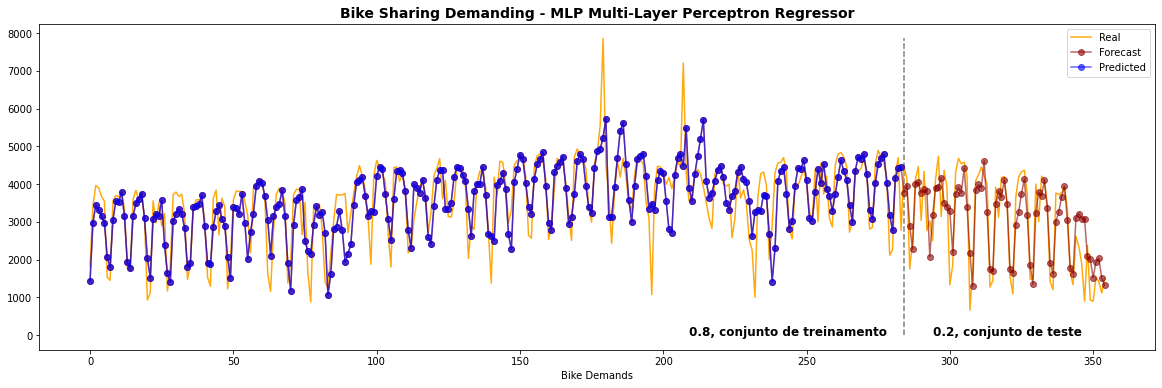

MSE: 	 479910.77
MAPE: 	 0.29
ME: 	 41.79
MAE: 	 563.62
MPE: 	 0.15
RMSE: 	 692.76
ACF1: 	 -0.06
CORR: 	 0.85


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [40]:
plot_forecast(y, y_pred, X_train, title='Bike Sharing Demanding - MLP Multi-Layer Perceptron Regressor') 

cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['MLPRegressor'] = cur_metrics

In [41]:
print('Mean Absolute Error')
print()
 
for key, item in dict_metrics.items():
  print(f"{key} MAE: {item['MAE']:.2f}")

Mean Absolute Error

ARIMA Model MAE: 535.00
DecisionTreeRegressor MAE: 687.96
GradientBoostingRegressor MAE: 622.81
MLPRegressor MAE: 563.62


Do mesmo modo que nos modelos anteriores o modelo MLP aproxima bastante bem a série de dados e oderíamos refinar o modelo para obter resultados ainda melhores. Em vez disso, vamos entender como podemos empregar esses mesmos modelos para Séries Multivariadas.

### Modelo MultiVariado

No capítulo anterior você estudou modelos de Séries de Dados multivariadas como o VARIMA. Nesses modelos a Série de Saída, digamos série $a$, depende de mais de uma Série de Dados de Entrada no tempo, digamos as séries $a$ e $b$.

$  \space \space \space \text{Lag 1: } \space \space \space \space (x_{t-1}^a,x_{t-1}^b)  \rightarrow x_t^a $

$  \space \space \space \text{Lag 2: } \space \space \space \space (x_{t-2}^a,x_{t-2}^b), (x_{t-1}^a,x_{t-1}^b)   \rightarrow x_t^a $

$  \space \space \space \text{Lag 3: } \space \space \space \space (x_{t-3}^a,x_{t-3}^b), (x_{t-2}^a,x_{t-2}^b), (x_{t-1}^a,x_{t-1}^b)   \rightarrow x_t^a $

$  \space \space \space \space \space \space ...$

$  \space \space \space \text{Lag n: } \space \space \space \space (x_{t-n}^a,x_{t-n}^b), ..., (x_{t-1}^a,x_{t-1}^b)   \rightarrow x_t^a $

Os modelos de Aprendizado de Máquina reconstruir esse mapeamento de Entradas e Saídas e para isso basta adicionarmos ao nosso conjunto de dados uma nova série de entradas.

Vamos adicionar então ao nosso modelo os dados de velocidade do vento e verificar o quanto o nosso modelo melhora a sua predição de demanda por bicicletas.

In [42]:
df_wind = ml_timeseries_df(df_resample[['wind_speed']], n_lags=7, prefix='wind_')
df_wind.head()

,wind_t-7,wind_t-6,wind_t-5,wind_t-4,wind_t-3,wind_t-2,wind_t-1,t
0,15.0,14.0,27.5,30.5,27.0,44.0,48.0,37.0
1,14.0,27.5,30.5,27.0,44.0,48.0,37.0,39.0
2,27.5,30.5,27.0,44.0,48.0,37.0,39.0,30.0
3,30.5,27.0,44.0,48.0,37.0,39.0,30.0,40.0
4,27.0,44.0,48.0,37.0,39.0,30.0,40.0,45.0


In [43]:
df = pd.concat([df_wind.drop(columns='t'), df],axis=1)
df.head()


,wind_t-7,wind_t-6,wind_t-5,wind_t-4,wind_t-3,wind_t-2,wind_t-1,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,15.0,14.0,27.5,30.5,27.0,44.0,48.0,1039.0,3161.0,3534.0,3618.0,2351.0,3505.0,1436.0,1813
1,14.0,27.5,30.5,27.0,44.0,48.0,37.0,3161.0,3534.0,3618.0,2351.0,3505.0,1436.0,1813.0,3418
2,27.5,30.5,27.0,44.0,48.0,37.0,39.0,3534.0,3618.0,2351.0,3505.0,1436.0,1813.0,3418.0,3960
3,30.5,27.0,44.0,48.0,37.0,39.0,30.0,3618.0,2351.0,3505.0,1436.0,1813.0,3418.0,3960.0,3904
4,27.0,44.0,48.0,37.0,39.0,30.0,40.0,2351.0,3505.0,1436.0,1813.0,3418.0,3960.0,3904.0,3673


In [44]:
X = df.drop(columns='t')
y = df[['t']] 

X_train, y_train, X_test, y_test = split_train_test(X, y, test_perc=0.2)

In [45]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(8,16,8), random_state=1, max_iter=2000)

regr.fit(X_train,y_train.values.reshape(-1))

y_pred = regr.predict(X)



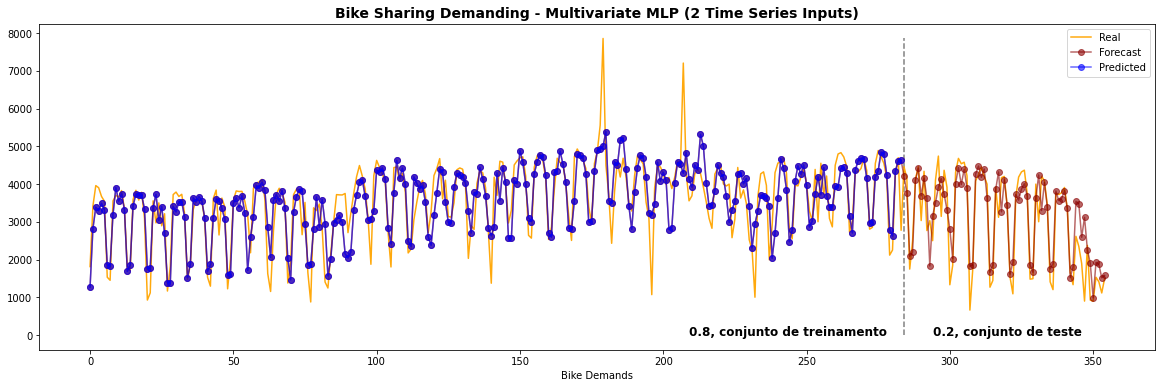

MSE: 	 386396.82
MAPE: 	 0.24
ME: 	 126.38
MAE: 	 459.65
MPE: 	 0.16
RMSE: 	 621.61
ACF1: 	 -0.11
CORR: 	 0.88


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [46]:
plot_forecast(y, y_pred, X_train, title='Bike Sharing Demanding - Multivariate MLP (2 Time Series Inputs)') 

cur_metrics = forecast_accuracy(y_pred[len(y_train):], y[len(y_train):].values.reshape(-1))
dict_metrics['MLPRegressor with 2 input series'] = cur_metrics

In [47]:
print('Mean Absolute Error')
print()
 
for key, item in dict_metrics.items():
  print(f"{key} MAE: {item['MAE']:.2f}")

Mean Absolute Error

ARIMA Model MAE: 535.00
DecisionTreeRegressor MAE: 687.96
GradientBoostingRegressor MAE: 622.81
MLPRegressor MAE: 563.62
MLPRegressor with 2 input series MAE: 459.65


Nosso resultado agora é até mesmo melhor que o modelo unidimensional ARIMA e você pode ver que pudemos adaptar o modelo com o mínimo de esforço.

## Deep Learning

Séries Multivariadas e janelas de ciclo de tempo muito longas podem levar a Séries de Dados bastante multidimensionais. Tratar grandes volumes de dados com alta dimensionalidade exige capacidade de processamento e otimizações de código que você encontra normalmente em Frameworks de redes profundas como o `PyTorch` (Meta) ou o `TensorFlow`(Google), ou mesmo no pacote de Séries Temporais da Meta, o `NeuralProphet`.

A construção detalhada desses modelos de Deep Learning e o uso desses Frameworks estão bem além do que caberia nesta introdução, mas dada a importância e o uso cada vez maior desses modelos, cabe ao menos criarmos um modelo simples, seguindo a nossa filosofia de criar uma porta de entrada à você para modelos mais sofisticados, mas sem entrar em muito detalhes da codificação que você poderá buscar mais adiante em outras referências.

Vamos empregar aqui o Framework `PyTorch`, sendo um dos mais empregados e bem sucedidos Frameworks de redes neurais profundas. Essas redes normalmente são associadas a um grande número de camadas e um grande número de elementos. Na verdade não é exatamente assim e podemos encontrar redes Deep Learning que tenham mesmo um número pequeno de elementos e camadas (para os padrões de centenas e milhares que em geral encontramos). Uma das possibilidades que torna o uso de redes neurais profundas particularmente interessantes para a predição de séries temporais é que podemos implementar arquiteturas recorrentes em que a saída da rede realimenta a rede, podendo-se definir ainda a profundidade dessa realimentação. Você deve ter notado a semelhança disso com os modelos de Séries Temporais. 

No modelo a seguir empregaremos uma arquitetura **LSTM**, ou **Long Short-Term Memory**, que é uma arquitetura de rede neural recorrente artificia capaz de processar sequências inteiras de dados. Vamos fazer aqui uma predição empregando unicamente a Série de Dados de demanda de bicicletas. O código apresenta uma série de desafios técnicos para o iniciante e sugiro você seguir, em um primeiro momento, apenas os comentários do que cada parte está construindo.



### Imports

In [48]:
import torch
import torch.nn as nn
from torch.autograd import Variable

### Preparação dos Dados

Os dados serão organizados do mesmo modo que empregamos antes, embora existam, no caso das redes LSTM outras formas mais eficientes de empregarmos.

In [49]:
df = ml_timeseries_df(df_resample[['cnt']], n_lags=7)
df.head(7)

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1039.0,3161.0,3534.0,3618.0,2351.0,3505.0,1436.0,1813
1,3161.0,3534.0,3618.0,2351.0,3505.0,1436.0,1813.0,3418
2,3534.0,3618.0,2351.0,3505.0,1436.0,1813.0,3418.0,3960
3,3618.0,2351.0,3505.0,1436.0,1813.0,3418.0,3960.0,3904
4,2351.0,3505.0,1436.0,1813.0,3418.0,3960.0,3904.0,3673
5,3505.0,1436.0,1813.0,3418.0,3960.0,3904.0,3673.0,3546
6,1436.0,1813.0,3418.0,3960.0,3904.0,3673.0,3546.0,1531


Modelos de Deep Learning empregam os dados no formato de **Tensores** que são arrays multidimensionais bastante semelhantes aos empregados no `NumPy` mas que possuem algoritmos mais eficientes para o processamento além de acesso a recursos de GPU. Nesses modelos dos dados de entrada e saída são em geral normalizados. 

In [50]:
min = df.min().min()
max = df.max().max()

In [51]:
for c in df:
  df[c] = ( df[c] - min ) / ( max - min )

Dados normalizados:

In [52]:
df.head(7) 

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.052639,0.347361,0.399167,0.410833,0.234861,0.395139,0.107778,0.160139
1,0.347361,0.399167,0.410833,0.234861,0.395139,0.107778,0.160139,0.383056
2,0.399167,0.410833,0.234861,0.395139,0.107778,0.160139,0.383056,0.458333
3,0.410833,0.234861,0.395139,0.107778,0.160139,0.383056,0.458333,0.450556
4,0.234861,0.395139,0.107778,0.160139,0.383056,0.458333,0.450556,0.418472
5,0.395139,0.107778,0.160139,0.383056,0.458333,0.450556,0.418472,0.400833
6,0.107778,0.160139,0.383056,0.458333,0.450556,0.418472,0.400833,0.120972


Armazenados como Tensores e separados nos conjuntos de Treinamento e Teste como antes. Note a dimensão dos Tensores.

In [53]:
X = df.drop(columns='t')
y = df[['t']] 

X = torch.tensor(np.array(X)).unsqueeze(-1) 
y = torch.tensor(np.array(y))

X = X.type(torch.float)
y = y.type(torch.float)

X_train, y_train, X_test, y_test = split_train_test(X, y, test_perc=0.2)

In [54]:
X.shape

torch.Size([355, 7, 1])

In [55]:
y.shape

torch.Size([355, 1])

### Modelo da Rede e Treinamento

As duas funções a seguir são modelos bastante típicos de definição de uma rede e do seu treinamento e você, se tiver interesse, pode encontrar inúmeras referências e tutoriais dessas funções no site do projeto https://pytorch.org/.

#### Classe de Definição da Rede LSTM

In [56]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, (h_out, cn) = self.lstm(x)
     
        h_out = h_out[-1]                         # saída da última camada para a camada fc
        h_out = h_out.view(-1,self.hidden_size)  
        out_final = self.fc(h_out)

        return out_final

#### Classe de Treinamento da Rede

De modo análogo a um modelo neural em camadas o aprendizado, ou o ajuste dos pesos da rede, se dá de forma iterativa e emprega um otimizador que busca a cada etapa do treinamento encontrar valores para os pesos que minimizem o erro de saída do modelo. 

In [57]:
def train(model, optmizer, loss_f, num_epochs, data_train_x, data_train_y):

  for epoch in range(num_epochs):
    
    outputs = model(data_train_x)
    loss = loss_f(outputs, data_train_y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    if epoch % 500 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

In [58]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1 # input size!!! uma única série de dados
hidden_size = 8

for num_layers in range(2,3):

  model = LSTM(input_size, hidden_size, num_layers)

  loss_function = torch.nn.MSELoss()    
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  train(model, optimizer, loss_function, num_epochs, X_train, y_train)

  model.eval()


Epoch: 0, loss: 0.66170
Epoch: 500, loss: 0.00795
Epoch: 1000, loss: 0.00713
Epoch: 1500, loss: 0.00645


In [59]:
prediction = model(X)
data_predict = prediction.data.numpy()


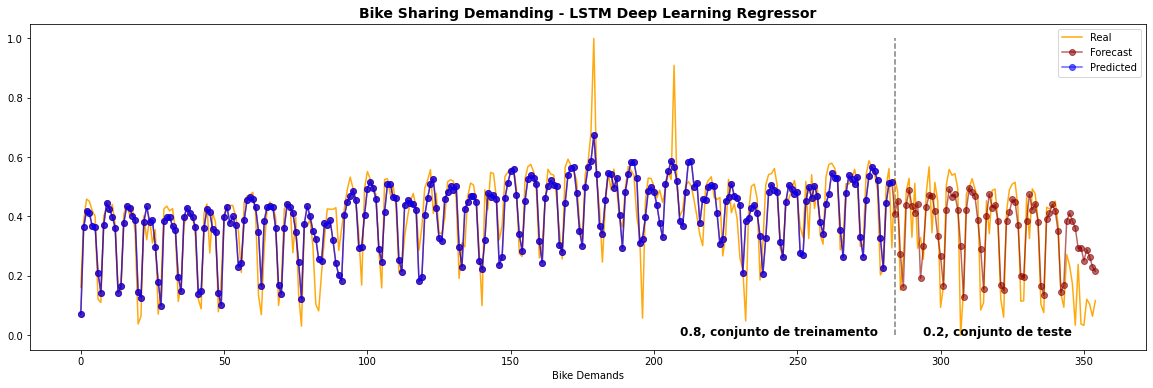

In [60]:
plot_forecast(df[['t']] , data_predict, X_train, title='Bike Sharing Demanding - LSTM Deep Learning Regressor')   

Para obtermos as métricas nas mesmas medidas dos modelos anteriores vamos reescalar novamente os dados voltando aos valores originais antes da normalização. 

In [61]:
y_forecast = data_predict[train_size::].reshape(-1) * (max - min) + min
y_real = np.array( y[train_size::] ).reshape(-1) * (max - min) + min

cur_metrics = forecast_accuracy(y_forecast, y_real)

dict_metrics['LSTM Deep Learning Regressor'] = cur_metrics

MSE: 	 672321.12
MAPE: 	 0.38
ME: 	 219.02
MAE: 	 645.66
MPE: 	 0.28
RMSE: 	 819.95
ACF1: 	 0.21
CORR: 	 0.81


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Como antes diversos ajustes poderiam ser feitos para melhorar os resultados do modelo.

### Intervalo de Confiança

Muitos modelos de aprendizado de máquina, e em particular modelos Deep Learning, são, diferentemente de modelos tradicionais modelos de regressão linear ou os modelos AR, MA, ARMA ou ARIMA, são modelos não determinísticos. Isto significa que você pode obter um modelo e, em seguida, obter um modelo diferente. Para ajudar, você pode imaginar que uma função de erro pode ter mais de um ponto de mínimo local. Uma prática comum é então fazermos médias de vários modelos e podermos assim obter um Intervalo de Confiança das predições. Não há um padrão para a obtenção desses Intervalos em modelos neurais mas o procedimento abaixo obtêm um Intervalor de Confiança bastante útil dos valores. A execução pode, entretanto, levar alguns minutos

In [63]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1 # input size!!! agora com duas séries de entrada
hidden_size = 16

data_predict_list = []

for i in range(20):
  print(i)
  for num_layers in range(2,3):

    model = LSTM(input_size, hidden_size, num_layers)

    loss_function = torch.nn.MSELoss()    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train(model, optimizer, loss_function, num_epochs, X_train, y_train)

    model.eval()
    prediction = model(X)
    data_predict = prediction.data.numpy()
    dataY_plot = y.data.numpy()

    data_predict_list.append(data_predict)
    


0
Epoch: 0, loss: 0.11224
Epoch: 500, loss: 0.00571
Epoch: 1000, loss: 0.00118
Epoch: 1500, loss: 0.00025
1
Epoch: 0, loss: 0.32866
Epoch: 500, loss: 0.00737
Epoch: 1000, loss: 0.00544
Epoch: 1500, loss: 0.00272
2
Epoch: 0, loss: 0.38741
Epoch: 500, loss: 0.00681
Epoch: 1000, loss: 0.00399
Epoch: 1500, loss: 0.00142
3
Epoch: 0, loss: 0.27916
Epoch: 500, loss: 0.00708
Epoch: 1000, loss: 0.00414
Epoch: 1500, loss: 0.00147
4
Epoch: 0, loss: 0.04771
Epoch: 500, loss: 0.00271
Epoch: 1000, loss: 0.00037
Epoch: 1500, loss: 0.00004
5
Epoch: 0, loss: 0.14799
Epoch: 500, loss: 0.00577
Epoch: 1000, loss: 0.00260
Epoch: 1500, loss: 0.00090
6
Epoch: 0, loss: 0.09019
Epoch: 500, loss: 0.00652
Epoch: 1000, loss: 0.00295
Epoch: 1500, loss: 0.00301
7
Epoch: 0, loss: 0.18830
Epoch: 500, loss: 0.00608
Epoch: 1000, loss: 0.00276
Epoch: 1500, loss: 0.00147
8
Epoch: 0, loss: 0.40620
Epoch: 500, loss: 0.00712
Epoch: 1000, loss: 0.00433
Epoch: 1500, loss: 0.00182
9
Epoch: 0, loss: 0.18045
Epoch: 500, loss: 0.

In [64]:
mean_predict = []
std_predict = []

nr_y_hat = len(data_predict_list[0])

for i in range(nr_y_hat):
  y_hat = []
  for d in data_predict_list:
    y_hat.append(d[i])
  mean_predict.append(np.array(y_hat).mean())
  std_predict.append(np.array(y_hat).std())

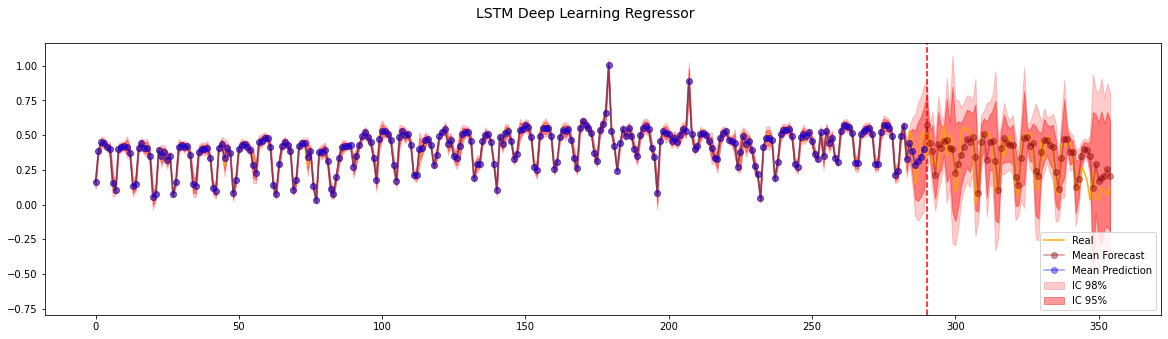

In [65]:
plt.figure(figsize=(20,5))
plt.axvline(x=train_size, c='r', linestyle='--')

#for i in range(len(data_predict_list)):
#  plt.plot(data_predict_list[i], Label='Prediction' + str(i))
mean_predict = np.array(mean_predict)
std_predict = np.array(std_predict)

plt.plot(y, color='orange', alpha=0.95, label='Real')
plt.plot(mean_predict, color='darkred', alpha=0.4, label='Mean Forecast', marker='o')
plt.plot(mean_predict[0:train_size], color='blue', alpha=0.4, Label='Mean Prediction', marker='o')

plt.fill_between(np.arange(0,len(df)), mean_predict-3*std_predict, mean_predict+3*std_predict, label='IC 98%', color='red', alpha=.2)
plt.fill_between(np.arange(0,len(df)), mean_predict-2*std_predict, mean_predict+2*std_predict, label='IC 95%', color='red', alpha=.4)

plt.legend(loc='lower right')
plt.suptitle(f'Bike Sharing Demanding - LSTM & Confidential Intervals', fontsize=14)

plt.show()

# Síntese

Aqui você conheceu e aprendeu como aplicar uma série de modelos de Aprendizado de Máquina, incluindo modelos sofisticados de Redes Neurais Profundas, na predição de Séries Temporais. Esses modelos vem sendo cada vez mais aplicados em diversos campos e ferramentas poderosas vem empregando essas técnicas para Séries com grande volume de dados, alta dimensionalidade e não linearidade. Embora de modo prático bastante poderosos e fácil de serem aplicados (veja que independente de seu conhecimento de `Python` são poucas linhas de código para implementar modelos bastante sofisticados) esses modelos requerem cuidado e, muitas vezes, não fornecem um valor explicativo sobre as Séries como vimos nos modelos mais tradicionais (AR, MA, ARMA, ARIMA etc.). Esses continuam a ser modelos essenciais de análise e recomendo que você empregue modelos de Aprendizado de Máquina em conjunto com modelos de Análise mais tradicionais. Um princípio importante da modelagem, o princípio da **Navalha de Ockham** ou **Princípio da Parcimônia**, prega que entre dois modelos que apresentem o mesma eficiência você deve optar pelo modelo mais simples, que reduz o número de hipóteses envolvidas, e uma grande parte dos problemas de Séries Temporais ainda parecem poder ser melhor resolvidos com modelos tradicionais e que fornecem ainda informações importantes da estrutura dos dados. 

Apesar disso os modelos de aprendizado de máquina e redes profundas podem encontrar aplicações bastante práticas que não poderíamos resolver de outro modo e sugerimos você se familiarizar com eles. 






# Para Saber Mais

* O site http://playground.tensorflow.org/ permite você experimentar um modelo neural sem a necessidade de codificar. Esse *playground* está configurado inicialmente para tarefas de classificação, mas você pode setar o tipo de problema para *regressão* que é o que estudamos aqui. Lá você poderá configurar o número camadas da rede, o número de elementos, a função de ativação e acompanhar o treinamento da rede a curva de aprendizado do modelo (a evolução da função de erro).  

* VANDERPLAS, Jake. **Python data science handbook: Essential tools for working with data.** O'Reilly Media, Inc., 2016. https://jakevdp.github.io/PythonDataScienceHandbook/ Acesso em: 2022.02.25.

* ZHANG, Aston et al. **Dive into deep learning.** arXiv preprint arXiv:2106.11342, 2021. https://d2l.ai/. Acesso em: 2022.02.25.


